## Introduction

You have left behind a very tiring day and now you want to watch a good movie. This time period that you want to spend with pleasure can be challenging with the abundance of movie options. We are lucky that recommender systems exist for this. 

A user-based collaborative filtering recommendation system for preferences in movie selection could make predictions about which movie a user should like given a partial list of that user's tastes.

User-based collaborative filtering is a method of making predictions about the interests of a user by collecting preferences of many other users. The underlying assumption of this approach is that if a User-1 has the same opinion as a User-3 on an issue, User-1 is more likely to have User-3's opinion on a different issue than that of a randomly chosen person.  


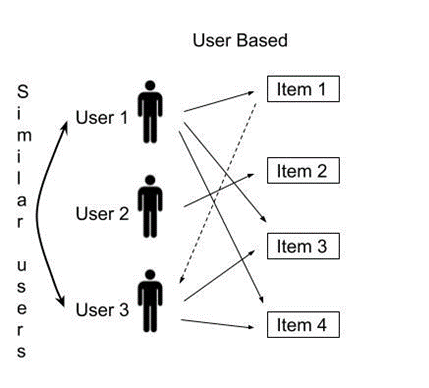

**Context**

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.

Users were selected at random for inclusion. All selected users had rated at least 20 movies.

**Business Problem**

Make a movie recommendation using the user-based recommender method for the user whose ID is given.



**Attribute Information**

The two files from the data will be used in this study as rating.csv and movie.csv

rating.csv that contains ratings of movies by users:

*     userId 
*     movieId 
*     rating 
*     timestamp

movie.csv that contains movie information:

*     movieId 
*     title
*     genres

**Task Details**

**Step 1:** Preparing the Data Set

**Step 2:** Determining the Movies Watched by the User to Suggest

**Step 3:** Accessing Data and Ids of Other Users Watching Same Movies

**Step 4:** Identifying Users with the Most Similar Behaviors to the User to Suggest

**Step 5:** Calculating the Weighted Average Recommendation Score

In [1]:
import pandas as pd
!pip install openpyxl

     |████████████████████████████████| 242 kB 4.3 MB/s            


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

## Step 1: Preparing the Data Set

In [3]:
movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
df = movie.merge(rating, how="left", on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [4]:
comment_counts = pd.DataFrame(df["title"].value_counts())
comment_counts

,title
Pulp Fiction (1994),67310
Forrest Gump (1994),66172
"Shawshank Redemption, The (1994)",63366
"Silence of the Lambs, The (1991)",63299
Jurassic Park (1993),59715
...,...
Rapture (Arrebato) (1980),1
"Education of Mohammad Hussein, The (2013)",1
Satanas (2007),1
Psychosis (2010),1


As you can see, some movies have less comments. In this case, it would be a right step to determine a threshold value and eliminate the films with less comments.

In [5]:
rare_movies = comment_counts[comment_counts["title"] <= 1000].index
common_movies = df[~df["title"].isin(rare_movies)]

Now we have common movies to use, but we need a user-item rating matrix with the titles in columns and userIds in rows.

In [6]:
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating") 
user_movie_df.head()

title   'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  \
userId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1.0                    NaN                          NaN                             NaN                            NaN                                NaN               NaN                    NaN                                                NaN                         NaN                  NaN                      NaN               NaN                    NaN                       NaN          NaN                NaN               NaN              NaN                                 NaN   
2.0                    NaN                          NaN                             NaN                            NaN                                NaN               NaN                    NaN                                                NaN                         NaN                  NaN                      NaN               NaN                    NaN                       NaN          NaN                NaN               NaN              NaN                                 NaN   
3.0                    NaN                          NaN                             NaN                            NaN                                NaN               NaN                    NaN                                                NaN                         NaN                  NaN                      NaN               NaN                    NaN                       NaN          NaN                NaN               NaN              NaN                                 5.0   
4.0                    NaN                          NaN                             NaN                            NaN                                NaN               NaN                    NaN                                                NaN                         NaN                  NaN                      NaN               NaN                    NaN                       NaN          NaN                NaN               NaN              NaN                                 NaN   
5.0                    NaN                          NaN                             NaN                            NaN                                NaN               NaN                    NaN                                                NaN                         NaN                  NaN                      NaN               NaN                    NaN                       NaN          NaN                NaN               NaN              NaN                                 NaN   

title   2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  \
userId                                                

## Step 2: Determining the Movies Watched by the Selected User

First we will select a user. The recommendation system will eventually make suggestions to that user.

In [7]:
random_user=28941

In the DataFrame we have userIds in rows and  titles in the columns. That means when we select this user from the DateFrame and select the titles which are not NaN, we can obtain the movies watched by the selected user

In [8]:
random_user_df = user_movie_df[user_movie_df.index == random_user]

movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()

len(movies_watched)

33

The user has watched 33 movies 

## Step 3: Getting Data and Ids of Other Users Watching Same Movies

We want to find users who watched the same 33 movies as the user.
"movies_watched" contains movies watched by the selected user. Users who have rated any of the 33 movies here are included in this dataset.

In [9]:
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.shape[0]

138493

All users and the number of movies that watched by them

In [10]:
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count

userId
1.0          1
2.0          2
3.0          4
4.0          6
5.0         11
            ..
138489.0     1
138490.0     7
138491.0     0
138492.0     2
138493.0     9
Length: 138493, dtype: int64

In [11]:
user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["userId", "movie_count"]
user_movie_count

,userId,movie_count
0,1.0,1
1,2.0,2
2,3.0,4
3,4.0,6
4,5.0,11
...,...,...
138488,138489.0,1
138489,138490.0,7
138490,138491.0,0
138491,138492.0,2


In [12]:
user_movie_count[user_movie_count["movie_count"] ==33].count()

userId         17
movie_count    17
dtype: int64

There are 17 other users watching the same 33 movies as the selected user.
We will select users who watched 20 and more common movies 

In [13]:
users_same_movies = user_movie_count[user_movie_count["movie_count"] > 20]["userId"]
users_same_movies.head()

129    130.0
155    156.0
157    158.0
183    184.0
294    295.0
Name: userId, dtype: float64

## Step 4: Identifying Users with the Most Similar Behaviors to the User to Suggest

We gather the data of our user and other users who watched 20 movies in common.

In [14]:
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])

final_df.head()

title,Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Aladdin (1992),"American President, The (1995)",Apollo 13 (1995),Babe (1995),Bullets Over Broadway (1994),Clueless (1995),Disclosure (1994),Forrest Gump (1994),Four Weddings and a Funeral (1994),Home Alone (1990),Jurassic Park (1993),Like Water for Chocolate (Como agua para chocolate) (1992),Little Women (1994),Mr. Holland's Opus (1995),Mrs. Doubtfire (1993),Much Ado About Nothing (1993),Muriel's Wedding (1994),Nine Months (1995),Operation Dumbo Drop (1995),"Piano, The (1993)","Postman, The (Postino, Il) (1994)",Ready to Wear (Pret-A-Porter) (1994),"Remains of the Day, The (1993)",Sabrina (1995),Schindler's List (1993),"Secret Garden, The (1993)",Sense and Sensibility (1995),Shadowlands (1993),"Silence of the Lambs, The (1991)",Star Trek: Generations (1994),Stargate (1994)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
130.0,4.0,3.0,NaN,3.0,3.0,NaN,NaN,3.0,5.0,5.0,5.0,3.0,4.0,3.0,NaN,4.0,4.0,NaN,3.0,NaN,NaN,4.0,4.0,NaN,3.0,NaN,5.0,NaN,NaN,3.0,5.0,NaN,3.0
156.0,3.0,NaN,NaN,5.0,5.0,3.0,NaN,NaN,4.0,5.0,3.0,4.0,5.0,NaN,NaN,4.0,5.0,4.0,3.0,3.0,4.0,5.0,NaN,NaN,NaN,4.0,5.0,NaN,4.0,4.0,5.0,3.0,4.0
158.0,2.0,1.0,4.0,4.0,3.0,5.0,NaN,4.0,NaN,5.0,4.0,3.0,3.0,NaN,NaN,3.0,3.0,NaN,5.0,3.0,3.0,NaN,5.0,NaN,5.0,3.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN
184.0,2.0,3.0,3.0,4.0,4.0,NaN,3.0,NaN,4.0,3.0,3.0,3.0,5.0,NaN,5.0,4.0,5.0,5.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,4.0,5.0,4.0,NaN,4.0,5.0,3.0,4.0
295.0,NaN,NaN,3.0,3.0,3.0,3.0,3.0,2.0,NaN,4.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,NaN,NaN,5.0,NaN,NaN,3.0,3.0,4.0,3.0,4.0,NaN,4.0,3.0,2.0


We get the Transpose so that the users are in the column.

In [15]:
final_df.T.corr()

userId    130.0     156.0     158.0     184.0     295.0     330.0     427.0     579.0     614.0         721.0     725.0     741.0     754.0     775.0     903.0     955.0     982.0     986.0     1007.0    1105.0    1155.0    1280.0    1302.0    1362.0    1367.0    1376.0    1411.0    1437.0    1507.0        1547.0    1560.0    1566.0    1617.0    1638.0    1645.0    1729.0    1748.0    1845.0    1849.0    1869.0    1931.0    1942.0    1966.0    1983.0    2094.0    2158.0    2171.0    2191.0    \
userId                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
130.0     1.000000  0.129185  0.261034  0.148936  0.596849  0.313425  0.478142  0.481330  0.215877  3.571375e-01  0.463732  0.439195  0.331869  0.155977  0.435379  0.189224  0.243108 -0.051053  0.378447  0.399282  0.620303  0.446265  0.027969 -0.330822  0.167328  0.388514  0.405343  0.103510  0.072487 -2.492289e-17 -0.099472 -0.354803  0.150000  0.450027  0.166470 -0.177934  0.317822  0.033635  0.385675  0.371817  0.049212  0.352224  0.401041  0.308383 -0.109632  0.334228 -0.041543  0.451382   
156.0     0.129185  1.000000  0.101749  0.685262  0.422885  0.435064 -0.371381  0.345646  0.378133  4.490887e-01  0.136354  0.579003  0.340576  0.362237  0.538235  0.359072  0.070636  0.194520  0.339956  0.165083 -0.154901  0.369872  0.415029 -0.287104  0.448920  0.311805  0.529996  0.397979  0.354594  1.455651e-01  0.232919  0.088624  0.359694  0.121849  0.295923 -0.191349  0.048056  0.207302  0.514054  0.187083  0.185881  0.628542 -0.221676  0.488273 -0.158821  0.109682 -0.315665 -0.072104   
158.0     0.261034  0.101749  1.000000  0.391555  0.371236  0.667808  0.541660  0.475673  0.686852  4.296689e-01  0.392669  0.541390  0.451078  0.803445  0.728650  0.571263  0.019753  0.740668  0.500180  0.645020  0.551677  0.374557  0.476326 -0.041363  0.581116  0.226367  0.734500  0.561769  0.421099 -2.980351e-01  0.604388 -0.067601  0.416497  0.568075  0.717912  0.395679  0.727729  0.545455  0.757547  0.476244 -0.244326  0.585429  0.196563  0.610288  0.502412  0.403872  0.448286 -0.061435   
184.0     0.148936  0.685262  0.391555  1.000000  0.172799  0.507972  0.297653  0.128885  0.484434  3.209815e-01 -0.143799  0.437644  0.045038  0.438640  0.367315  0.147614  0.050423  0.661173  0.604262  0.382128 -0.098882  0.127849  0.522976  0.073721  0.582142  0.251955  0.107805  0.245238  0.298810 -3.334620e-01  0.175021  0.129099  0.458508  0.518305  0.499198  0.033599  0.388281  0.258145  0.437311  0.132701  0.072366  0.393939  0.107152  0.334664 -0.164809  0.027086  0.040664 -0.088342   
295.0     0.596849  0.422885  0.371236  0.172799  1.000000  0.719195  0.178714  0.674272  0.282951  2.042179e-01  0.443299  0.566481  0.261302  0.422042  0.434538  0.178691  0.272857  0.324549  0.302926  0.497471  0.511575  0.479770  0.384954  0.055556  0.363896  0.071474  0.462069  0.390038  0.045006 -4.176345e-02  0.113627 -0.022537  0.088181  0.577083  0.510102  0.069720  0.255458  0.010166  0.516511  0.437772 -0.326495  0.408667  0.083183  0.265165  0.154010  0.394366  0.149154  0.059581   
...            ...       ...       ...       ...       ...       ...       ...       ...       ...           ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...           ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...   


We will create the correlation df

In [16]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

,user_id_1,user_id_2,corr
0,28866.0,67756.0,-0.936065
1,60562.0,37121.0,-0.915003
2,34103.0,80593.0,-0.898718
3,62575.0,21398.0,-0.896612
4,117826.0,48416.0,-0.883969


We found the correlation showing the similarity of likes for each person with another person.
Here is all the data, including low values and negative values. We need to filter this.

Users with a correlation of 65 percent or more with our user:

In [17]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users

,userId,corr
27,28941.0,1.000000
26,45158.0,0.800749
25,101628.0,0.790405
24,127259.0,0.763925
23,9783.0,0.747942
22,93089.0,0.738536
21,136259.0,0.737177
20,136259.0,0.737177
19,67346.0,0.732943
18,67346.0,0.732943


## Step 5: Calculating the Weighted Average Recommendation Score

We found the correlations, but we need to put them together with the movies.

In [18]:
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')
top_users_ratings = top_users.merge(rating[["userId", "movieId", "rating"]], how='inner')
top_users_ratings.head()

,userId,corr,movieId,rating
0,28941.0,1.0,7,5.0
1,28941.0,1.0,11,3.0
2,28941.0,1.0,17,5.0
3,28941.0,1.0,19,2.0
4,28941.0,1.0,34,5.0


Here the selected user is included, we need to remove that

In [19]:
top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]

**Calculation of weighted_rating**

Even if the correlation of the two people is high, the ratings they give to the movies may be different. In this case, the problem arises whether we should make the recommendation according to correlation or rating. To eliminate this, a score containing the effect of both is used.

In [20]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.head()

,userId,corr,movieId,rating,weighted_rating
33,45158.0,0.800749,1,1.5,1.201124
34,45158.0,0.800749,3,1.0,0.800749
35,45158.0,0.800749,17,3.5,2.802622
36,45158.0,0.800749,19,2.0,1.601498
37,45158.0,0.800749,22,3.0,2.402248


Here, weighted_ratings from all users for the movieId = 1 are included.
To make a recommendation, it should be averaged over the movie.

In [21]:
top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})

,weighted_rating
movieId,
1,2.205824
2,1.463950
3,1.181772
4,1.642769
5,1.151408
...,...
56367,2.565300
56508,2.931772
56788,2.565300


In [22]:
recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})

recommendation_df = recommendation_df.reset_index()

recommendation_df[["movieId"]].nunique()

movieId    4074
dtype: int64

Recommendation scores were created for 4074 movies.

In [23]:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3.7].sort_values("weighted_rating", ascending=False)
movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv')
movies_to_be_recommend.merge(movie[["movieId", "title"]])

,movieId,weighted_rating,title
0,30,3.952023,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
1,53,3.952023,Lamerica (1994)
2,242,3.952023,Farinelli: il castrato (1994)
3,326,3.952023,To Live (Huozhe) (1994)


As a result, we got movie recommendations for the selected user. 
Hope our user will  have fun by watching ;)